# Проект Procrastinate Pro+

**Изучим:**

* откуда приходят пользователи и какими устройствами они пользуются;
* сколько стоит привлечение пользователей из различных рекламных каналов;
* сколько денег приносит каждый клиент;
* когда расходы на привлечение клиента окупятся;
* какие факторы мешают привлечению клиентов.

**Задачи проекта:** 

1. Разобраться в причинах и помочь компании получить положительный денежный поток.
2. Составить профили пользователей и сделать вывод из каких стран, используя какие устройства приносят больше всего выручки
3. Выяснить какие рекламные каналы окупают вложения в них, а в какие приносят наименьшую эффективность для компании
4. Посчитать общие затраты на маркетинг и отдельно на каждый канал привлечения, что поможет сделать вывод по пункту 3
5. Оценить окупаемость рекламы при помощи коэффициентов, построить графики для наглядности и сделать выводы

**Описание данных** 

Структура visits_info_short.csv:

* User Id — уникальный идентификатор пользователя,
* Region — страна пользователя,
* Device — тип устройства пользователя,
* Channel — идентификатор источника перехода,
* Session Start — дата и время начала сессии,
* Session End — дата и время окончания сессии.

Структура orders_info_short.csv:

* User Id — уникальный идентификатор пользователя,
* Event Dt — дата и время покупки,
* Revenue — сумма заказа.

Структура costs_info_short.csv:

* dt — дата проведения рекламной кампании,
* Channel — идентификатор рекламного источника,
* costs — расходы на эту кампанию.

In [1]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# импортируем функции для работы со временем
from datetime import datetime, timedelta

In [2]:
try:
    visits = pd.read_csv('C:/Users/losky/practicum/practicum/visits_info_short.csv')
    orders = pd.read_csv('C:/Users/losky/practicum/practicum/orders_info_short.csv')
    costs = pd.read_csv('C:/Users/losky/practicum/practicum/costs_info_short.csv')
except:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
display(visits.head())
display(orders.head())
display(costs.head())

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [4]:
print(visits.info())
print('______________________________________')
print(orders.info())
print('______________________________________')
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None
______________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None
______________________________________
<class 'pandas.core.frame.DataFr

In [5]:
#рассмотрим дубликаты
print(visits.duplicated().sum())
print(orders.duplicated().sum())
print(costs.duplicated().sum())

0
0
0


In [6]:
#изменим тип данных и наименование колонок
visits.columns = visits.columns.str.lower()
visits = visits.rename(columns = {
    'user id':'user_id',
    'Region':'region',
    'Device':'device',
    'session start':'session_start',
    'session end':'session_end'
})

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [7]:
#изменим тип данных и наименование колонок
orders.columns = orders.columns.str.lower()
orders = orders.rename(columns = {
    'user id':'user_id',
    'event dt':'event_dt',
    'Revenue':'revenue'

})

orders['event_dt'] = pd.to_datetime(orders['event_dt'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [8]:
#изменим тип данных и наименование колонок
costs.columns = costs.columns.str.lower()
costs = costs.rename(columns = {
    'Dt':'dt',
    'Channel':'channel',
    'costs':'costs'
})

costs['dt'] = pd.to_datetime(costs['dt']).dt.date
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


**Вывод:**

Имеются данные о посетителях, их заказах и стоимости с указанием идентификаторов пользователей, регионов, устройств, каналов привлечения, начала и окончания сессии.\
\
Были изменены наименования атрибутов, проверены данные на пропуски и дубликаты, а также изменены типы данных.

## Предобработка данных

### Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Используем функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [9]:
#функция для создания профилей пользователей
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):
    
        #находим параметры первых посещений
        profiles = (
            sessions.sort_values(by=['user_id','session_start'])
            .groupby('user_id')
            .agg(
            {
                'session_start':'first',
                'channel':'first',
                'device':'first',
                'region':'first'
            }
            )
            .rename(columns={'session_start':'first_ts'})
            .reset_index()
        )
        
        #для когортного анализа определяем дату первого посещения
        #и первый день месяца, в который это посещение произошло
        profiles['dt'] = profiles['first_ts'].dt.date
        profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
        
        #добавляем признак платящих пользователей
        profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
        
        #добавляем флаги для всех событий из event_names
        for event in event_names:
            if event in events['event_name'].unique():
                profiles[event] = profiles['user_id'].isin(
                    events.query('event_name == @event')['user_id'].unique()
                )
                
        #считаем кол-во уникальных пользователей с одинаковым источником и датой привлечения
        new_users = (
            profiles.groupby(['dt', 'channel'])
            .agg({'user_id':'nunique'})
            .rename(columns={'user_id':'unique_users'})
            .reset_index()
        )
        
        #объединим траты на рекламу и число привлеченных пользователей
        ad_costs = ad_costs.merge(new_users, on=['dt','channel'], how='left')
            
        #делим рекламные расходы на число привлеченных пользователей
        ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
        
        #добавляем стоимость привлечения в профили
        profiles = profiles.merge(
            ad_costs[['dt', 'channel', 'acquisition_cost']],
            on=['dt', 'channel'],
            how='left'
        )
        
        #стоимость привлечения органических пользователей равна нулю
        profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
        
        return profiles

In [10]:
#функция подсчета Retention Rate (удержания)

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False
):
    #добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions
    
    #исключаем пользователей, "не доживших" до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
            last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    #собираем "сырые" данные для расчета удержания
    result_raw = result_raw.merge(
        sessions[['user_id','session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days
    
    #фун-я для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id':'nunique'})
            .rename(columns={'user_id':'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis = 0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result
        
    #получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    #получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
    
    #возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [11]:
#фун-я для подсчета конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False
):
    
    #исключаем пользователей, "не доживших" до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    #определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt':'first'})
        .reset_index()
    )
    
    #добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )
    
    #рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    
    #группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All_users'
        dimensions = dimensions + ['cohort']
    
    #фун-я для группироки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id':'nunique'})
            .rename(columns={'user_id':'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        #делим каждую "ячейку" в строке на размер когорты
        #и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result
    
    #получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    #для таблицы динамики конверсии убираем "cohort" из dimensions
    if 'cohort' in dimensions:
        dimensions = []
        
    #получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
    
    #возвращаем обе таблицы
    return result_raw, result_grouped, result_in_time

In [12]:
#фун-я для расчета LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False
):
    #исключаем пользователей, "не доживших" до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    #добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    #расчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    #группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']
        
    #фун-я группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        #строим "треугольную" таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        #находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        #вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id':'nunique'})
            .rename(columns={'user_id':'cohort_size'})
        )
        #объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        #считаем LTV: делим каждую "ячейку" в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        #исключаем все лайфтаймы, превыщающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        #восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        
        #собираем датафреймы с данными пользователей и значениями CAC, добавляя параметры из dimensionsabs
        cac = df[['user_id','acquisition_cost'] + dims].drop_duplicates()
        
        #считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost':'mean'})
            .rename(columns={'acquisition_cost':'cac'})
        )
        
        #считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)
        
        #удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        
        #восстанавливаем размеры когорт в таб. ROI
        roi['cohort_size'] = cohort_sizes
        
        #добавляем CAC в таб. ROI
        roi['cac'] = cac['cac']
        
        #в финальной таб. оставляем размеры когорт, CAC
        #и ROI в лайфтаймы, не превыщающие горизонт анализа
        
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        
        #возвращаем таб. LTV и ROI
        return result, roi
    
    #получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )
    
    #для таб. динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []
        
    #получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
    
    return (
        result_raw, #сырые данные
        result_grouped, #таблица LTV
        result_in_time, #таблица динамики LTV
        roi_grouped, #таблица ROI
        roi_in_time #таблица динамики ROI
    )

In [13]:
#фун-я для сглаживания данных (визуализация)

def filter_data(df, window):
    #для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

In [14]:
#фун-я для построения графика RR (удержания)

def plot_retention(retention, retention_history, horizon, window = 7):
    
    #зададим размер сетки для графиков
    plt.figure(figsize=(15,10))
    
    #исключаем размеры когорт и удержание 1-го дня
    retention = retention.drop(columns=['cohort_size', 0])
    #в таб. динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[[horizon - 1]]
    
    #если в индексах таблицы удержания только payer, добавляем 2-й признак - cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort','payer'])
        
    #в таб. графиков - 2 столбца и 2 строки, 4 ячейки
    #в 1-й строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2,2,1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')
    
    #во 2-й строке ячейке строим кривые удержания неплатящих
    #вертикальная ось - от графика из первой ячейки
    ax2 = plt.subplot(2,2,2, sharey = ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')
    
    #в 3-й ячейке - динамика удержания платящих
    ax3 = plt.subplot(2,2,3)
    #получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    #фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    #в 4-й ячейке - динамика удержания неплатящих
    ax4 = plt.subplot(2,2,4, sharey=ax3)
    #фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )
    plt.tight_layout()
    plt.show()

In [15]:
#фун-я для построение графика конверсии (визуализация)

def plot_conversion(conversion, conversion_history, horizon, window=7):
    #задаем размер сетки для графиков
    plt.figure(figsize=(15,5))
    
    #исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    #в таб. динамики оставляем только нужный лайфтайм 
    conversion_history = conversion_history.drop(columns=['cohort_size'])[[horizon - 1]]
    
    #первый график - кривые конверсии
    ax1 = plt.subplot(1,2,1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')
    
    #второй график - динамика конверсии
    ax2 = plt.subplot(1,2,2, sharey=ax1)
    columns = [
        #столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))
    
    plt.tight_layout()
    plt.show()

In [16]:
#фун-я для визуализации LTV и ROI (визуализация)

def plot_ltv_roi (ltv, ltv_history, roi, roi_history, horizon, window=7):
    
    #задаем сетку отрисовки графиков
    plt.figure(figsize=(20,10))
    
    #из таб. ltv исключаем размер когорт
    ltv = ltv.drop(columns=['cohort_size'])
    #в таб. динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    
    #стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]
    
    #из таб. roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size','cac'])
    #в таб. динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size','cac'])[[horizon - 1]]
    
    #первый график - кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')
    
    #второй график - динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    #столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')
    
    #3-й график - динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey = ax1)
    #столбцами сводной таблицы станут все столбцы, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')
    
    #4-й график - кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')
    
    #5-й график - данимака ROI
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    #столбцами сводной таб. станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))
    
    plt.tight_layout()
    plt.show()

Необходимые функции загружены, можно приступать к работе.

## Исследовательский анализ данных
### Составляем профили пользователей. Определяем мин. и макс. дату привлечения пользователей.

In [17]:
costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [18]:
events = None
min_date = costs['dt'].min()
max_date = costs['dt'].max()

In [19]:
profiles = get_profiles(visits, orders, events, costs)
display(min_date)
display(max_date)
display(profiles)
profiles.info()

datetime.date(2019, 5, 1)

datetime.date(2019, 10, 27)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


<class 'pandas.core.frame.DataFrame'>
Int64Index: 150008 entries, 0 to 150007
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           150008 non-null  int64         
 1   first_ts          150008 non-null  datetime64[ns]
 2   channel           150008 non-null  object        
 3   device            150008 non-null  object        
 4   region            150008 non-null  object        
 5   dt                150008 non-null  object        
 6   month             150008 non-null  datetime64[ns]
 7   payer             150008 non-null  bool          
 8   acquisition_cost  150008 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 10.4+ MB


**Вывод:**
Определили мин. и макс. даты привлечения пользователя из фрейма 'costs'. Мин. дата - 01.05.2019. Макс. дата - 27.10.2019.\
\
Составили портреты пользователей. Пользователей необходимо сгруппировать по регионам, устройствам, каналам привлечения, отобрать уникальных и визуализировать данные, чтобы сделать выводы. \
\
Выведенные даты совпадают с датами из ТЗ.

### Из каких стран приходят пользователи и на какую страну приходятся больше всего платящих пользователей. Нужно построить таблицу - кол-во пользователей и доля платящих из каждой страны.

In [20]:
profiles.groupby(['region']).agg({'user_id':'nunique', 'payer':'mean'}) \
.sort_values(by=['user_id','payer'],ascending=False).style.format({'payer': '{:.2%}'})

,user_id,payer
region,,
United States,100002,6.90%
UK,17575,3.98%
France,17450,3.80%
Germany,14981,4.11%


### Какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таб. - кол-во пользователей и доля платящих для каждого устройства.

In [21]:
profiles.groupby(['device']).agg({'user_id':'nunique', 'payer':'mean'}) \
.sort_values(by=['user_id','payer'],ascending=False)

,user_id,payer
device,,
iPhone,54479,0.062079
Android,35032,0.058518
PC,30455,0.050468
Mac,30042,0.063644


**Вывод:** \
Клиенты пользуются iPhone, Android, PC, Mac. Чаще всего для того, чтобы запустить приложение, пользователи используют мобильные устройства.\
\
Рейтинг устройств платящих клиентов: 

1. Mac
2. Iphone
3. Android
4. PC \
\
Можно сделать вывод, что продукция Apple лидирует.

### Изучение рекламных источников и определение каналов, откуда больше всего пришло платящих пользователей. Построим таб. - кол-во пользователей и доля платящих для каждого канала.

In [22]:
profiles.groupby(['channel']).agg({'user_id':'nunique', 'payer':'mean'}) \
.sort_values(by=['user_id','payer'],ascending=False)

,user_id,payer
channel,,
organic,56439,0.020553
FaceBoom,29144,0.122049
TipTop,19561,0.096007
OppleCreativeMedia,8605,0.027077
WahooNetBanner,8553,0.052964
LeapBob,8553,0.030633
RocketSuperAds,4448,0.079137
MediaTornado,4364,0.035747
YRabbit,4312,0.038265


**Вывод:** \
Сложно сказать об эффективности каналов, пока не произвести расчет расходов на каждый источник привлечения клиентов. Но можно сказать, что наилучший канал для привлечения по кол-ву привлеченных пользователей - это органическое привлечение, а по доле платящих клиентов - FaceBoom.

## Маркетинг

### Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. На календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

- Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.
- Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответим на вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

#### Общая сумма расходов на маркетинг

In [23]:
#сложим все расходы, чтобы посчитать общую сумму затрат на рекламные кампании
round(costs['costs'].sum(), 2)

105497.3

In [24]:
costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


#### Распределение трат по рекламным источникам - сколько денег потратили на каждый источник

In [25]:
costs_channel = costs.groupby('channel').agg({'costs':'sum'}) \
.sort_values(by='costs', ascending=False)

costs_channel['share'] = (costs_channel['costs'] / costs_channel['costs'].sum()) * 100
costs_channel

,costs,share
channel,,
TipTop,54751.30,51.898295
FaceBoom,32445.60,30.754910
WahooNetBanner,5151.00,4.882589
AdNonSense,3911.25,3.707441
OppleCreativeMedia,2151.25,2.039152
RocketSuperAds,1833.00,1.737485
LeapBob,1797.60,1.703930
lambdaMediaAds,1557.60,1.476436
MediaTornado,954.48,0.904744


**Вывод:** Больше всего было потрачено на такие каналы как: TipTop и FaceBoom. Меньше всего: MediaTornado и YRabbit

#### Визуализация динамики изменения расходов по времени (по неделям и месяцам) по каждому источнику

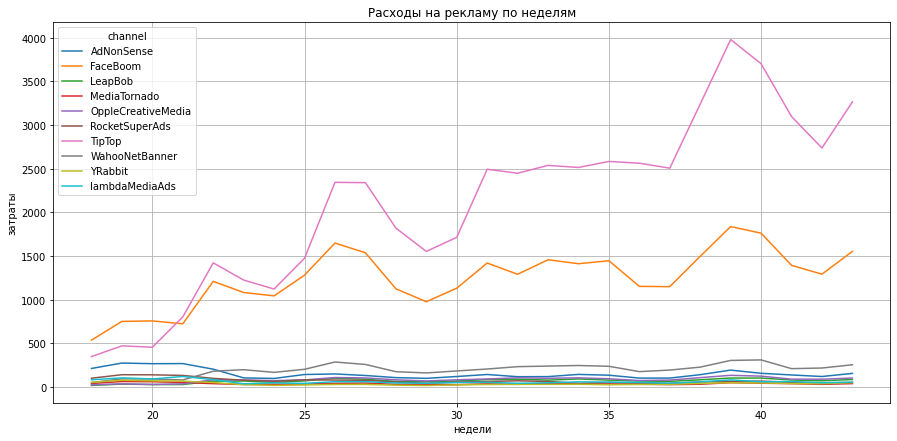

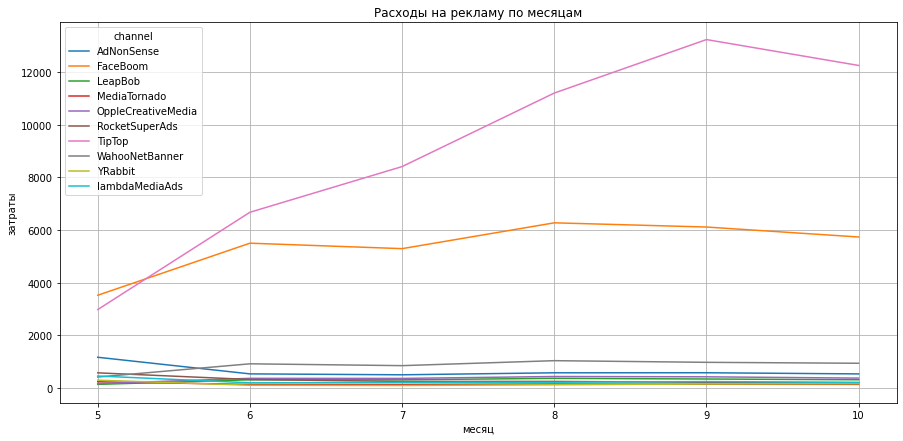

In [26]:
costs['dt'] = pd.to_datetime(costs['dt'])
#создаем новые колонки
costs['week'] = costs.dt.dt.isocalendar().week
costs['month'] = costs.dt.dt.month

#создаем 1-й график по неделям
costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum') \
.plot(grid=True, figsize=(15,7))
plt.title('Расходы на рекламу по неделям')
plt.xlabel('недели')
plt.ylabel('затраты')
plt.show

#создаем 2-й график по месяцам
costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum') \
.plot(grid=True, figsize=(15,7))
plt.title('Расходы на рекламу по месяцам')
plt.xlabel('месяц')
plt.ylabel('затраты')
plt.show;

**Вывод:** Значительные ресурсы компании уходят на расходы рекламу TipTop и FaceBoom. На остальные каналы приходится относительно малая часть, по сравнению с лидерами.

#### Средняя стоимость привлечения 1-го пользователя (CAC) из каждого источника

In [27]:
profiles.groupby('channel').agg({'user_id':'nunique', 'acquisition_cost':'mean'}) \
.sort_values(by='acquisition_cost', ascending=False)

,user_id,acquisition_cost
channel,,
TipTop,19561,2.799003
FaceBoom,29144,1.113286
AdNonSense,3880,1.008054
lambdaMediaAds,2149,0.724802
WahooNetBanner,8553,0.602245
RocketSuperAds,4448,0.412095
OppleCreativeMedia,8605,0.250000
YRabbit,4312,0.218975
MediaTornado,4364,0.218717


**Вывод:** Таким образом, самым невыгодным каналом привлечения является Tip Top, где цена привлечения 1-го клиента составляет 2,79. В то время как самым выгодным (не считая органическое привлечение) является LeapBob с ценой привлечения одного клиента 0,21.

#### Оцениваем окупаемость рекламы

##### Проведем фильтрацию и исключим из анализа органических пользователей

In [28]:
#органика не несет в себе трат, поэтому убираем её
profiles = profiles[profiles['channel'] != 'organic']

##### Окупаемость рекламы с помощью графиков LTV и ROI, также графиков динамики LTV, ROI, CAC

In [29]:
#указываем дату начала анализа
#и горизонт окупаемости рекламной кампании

horizon_days = 14
observation_date = datetime(2019, 11, 1).date()

In [30]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

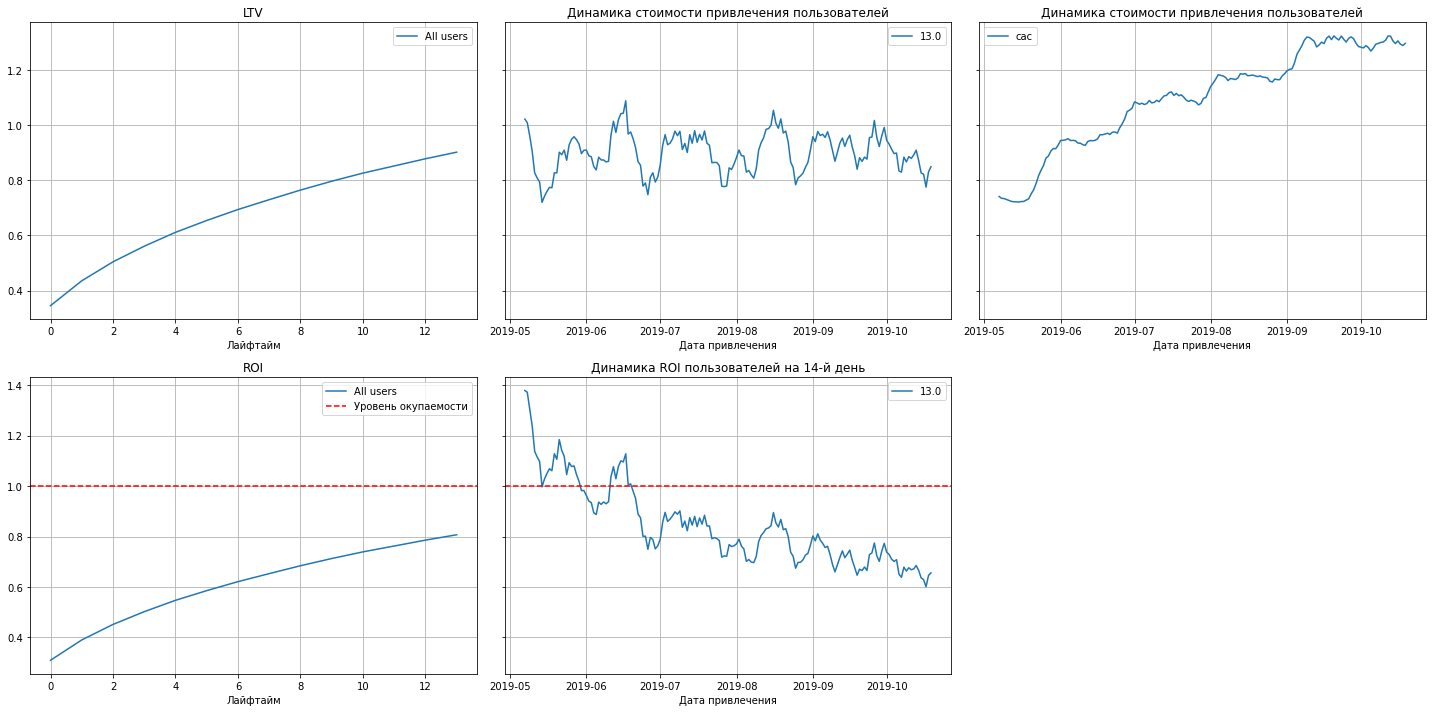

In [31]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

**Вывод:** 

* LTV стабилен. Видно, что примерно к 14-му дню дойдет до полной окупаемости от привлечения;
* ROI - реклама не окупается. В конце интересующего нас лайфтайма ROI не превышает 80%;
* CAC не стабилен. Возможно проблема в увеличении бюджета на рекламу.

##### Конверсия пользователей и динамика её изменения. Удержание пользователей. Построение и изучение графика конверсии и удержания

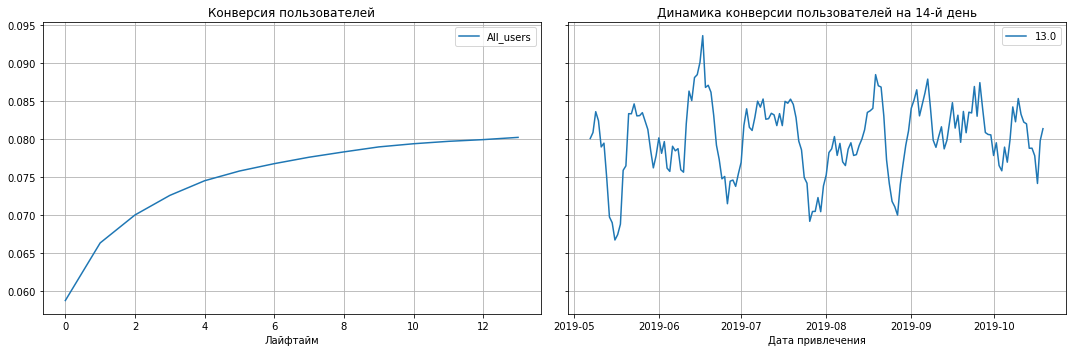

In [32]:
#Конверсия пользователей
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

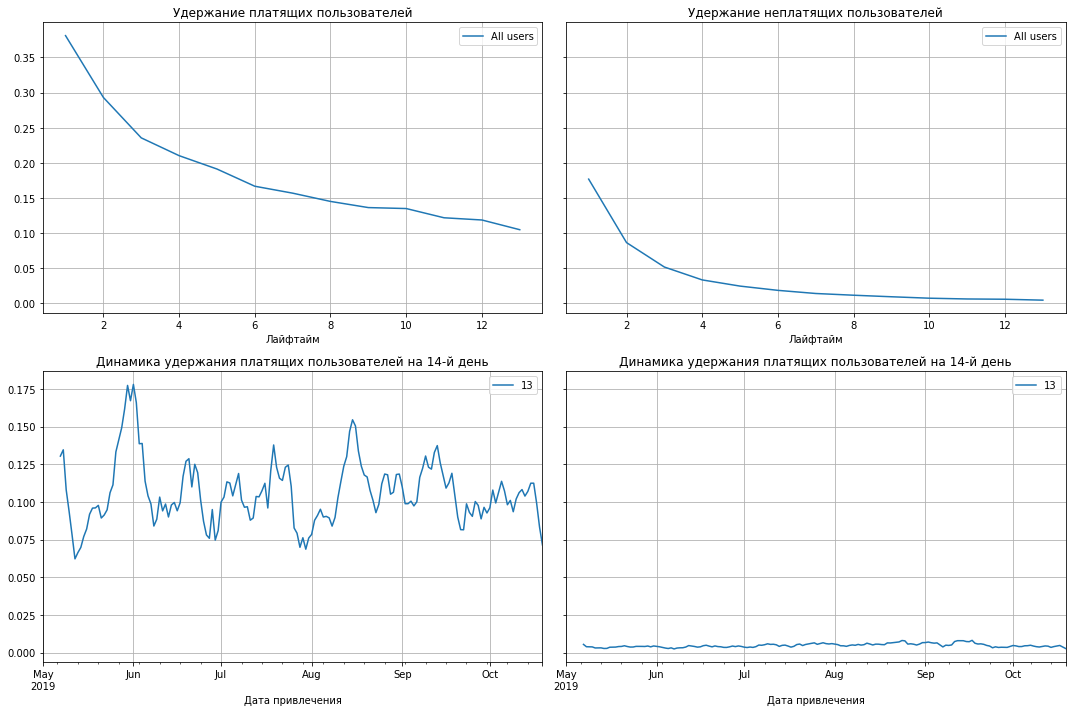

In [33]:
#Удержание пользователей
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод:**

* Стоит отметить некоторую сезонность - волнообразность по общей конверсии и удержанию
* Взглянув на конверсию, можно сказать, что она принимает нормальные значения
* Что касается удержание пользователей - у неплатящих к 14-му дню все уходит почти в 0, а у платящих к 14-му дню опускается почти до 0,1

##### Анализ окупаемости рекламы с разбивкой по устройствам. Построение графиков LTV и ROI,  а также графиков динамики LTV, CAC и ROI

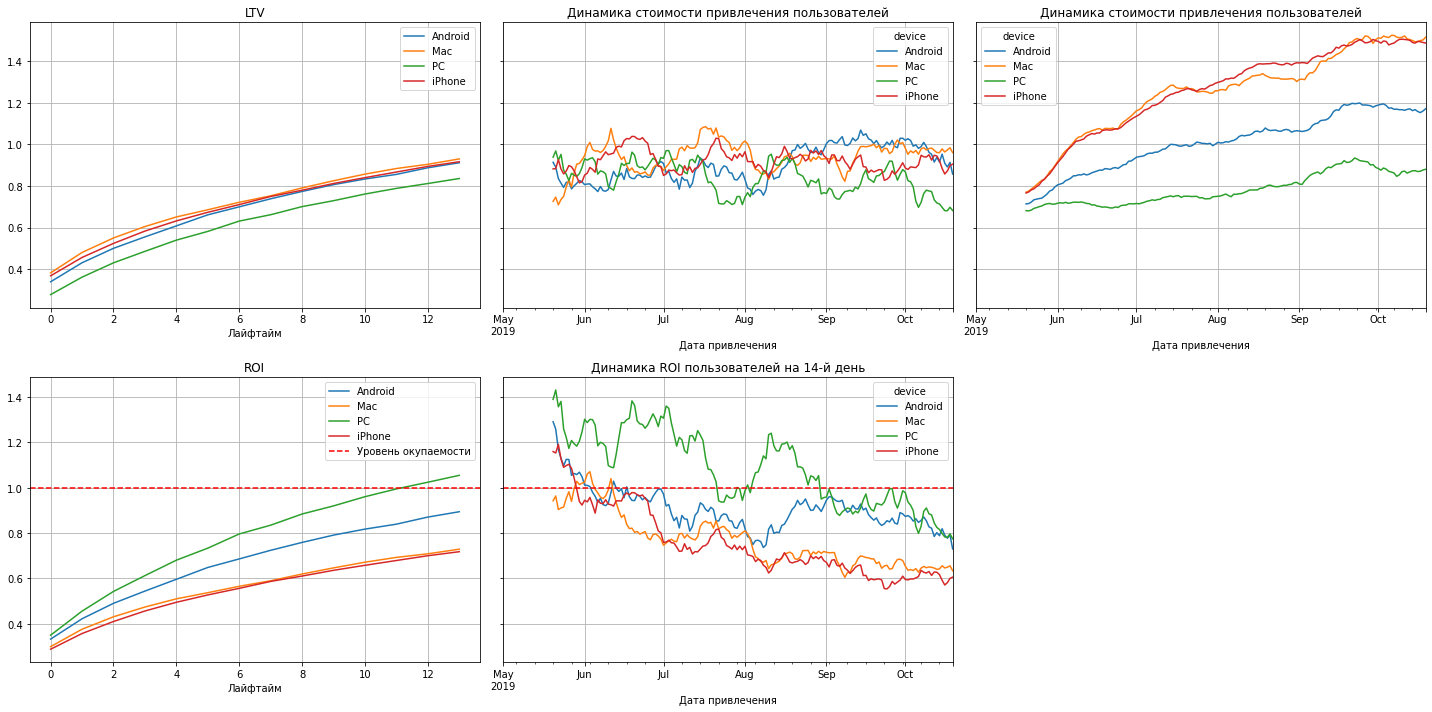

In [34]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=20)

**Вывод:**

* LTV показывает стабильность. Дело не в качестве пользователей;
* CAC растет по всем девайсам. Наибольшие значения по продукции Apple (Mac и Iphone). Наименьшая стоимость привлечения пользователей PC;
* ROI - окупается по всей компании только PC, Android примерно 90% в конце интересующего нас лайфтайма. Mac и Iphone - 70%.

##### Анализ окупаемости рекламы с разбивкой по странам. Построение графиков LTV, ROI и графиков динамики LTV, CAC и ROI

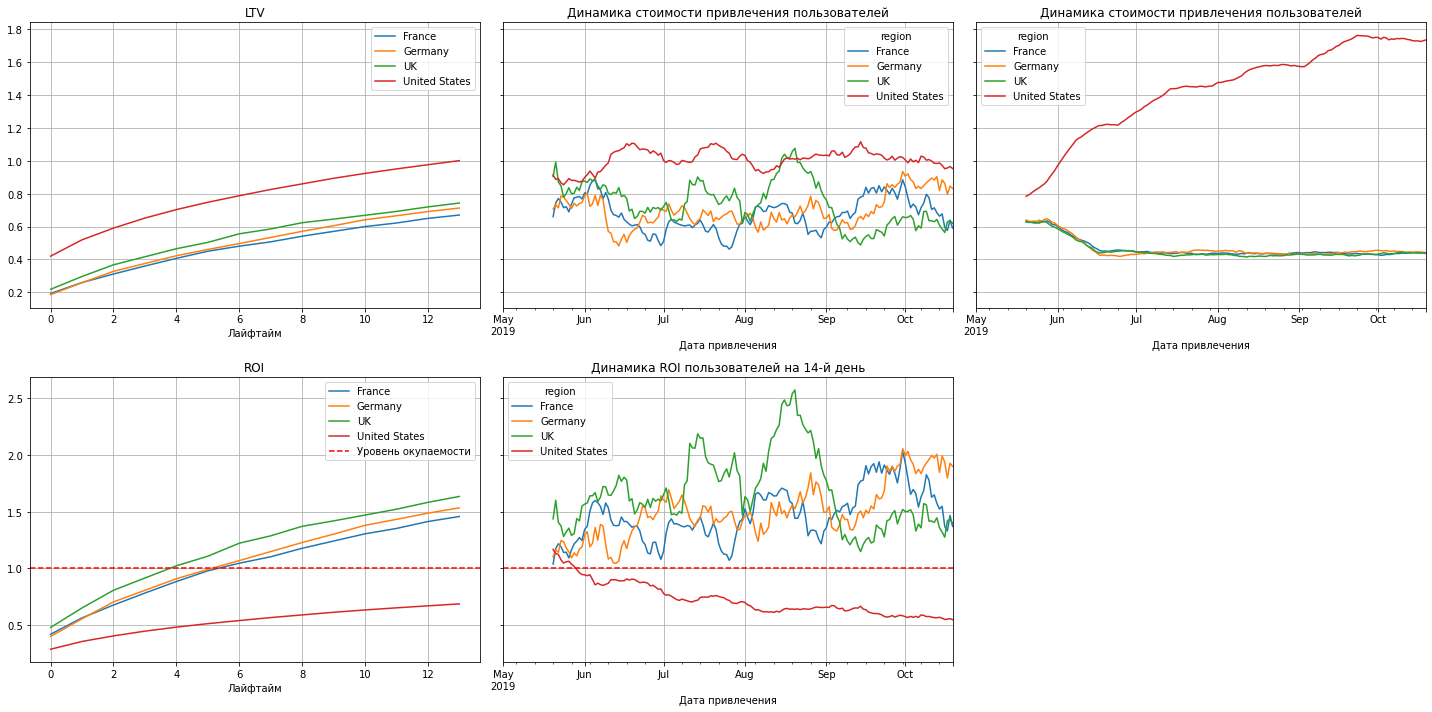

In [35]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=20)

**Вывод:**

* LTV - в течение 2-х недель клиенты из США приносят больше прибыли, чем клиенты из других стран;
* CAC - очень дорогие пользователи для привлечения в США по сравнению с другими странами, так же значения лишь растут, чего нельзя сказать о значениях других стран;
* ROI - рекламные кампании окупаются на 4-6 дней после начала во всех странах, которые участвуют в анализе, кроме США. В США рекламная компания не окупается;
* США сильно выделяется на фоне других стран.

##### Анализ окупаемости рекламы с разбивкой по рекламным каналам. Построение графиков LTV и ROI, а также графиков динамики LTV, ROI и CAC

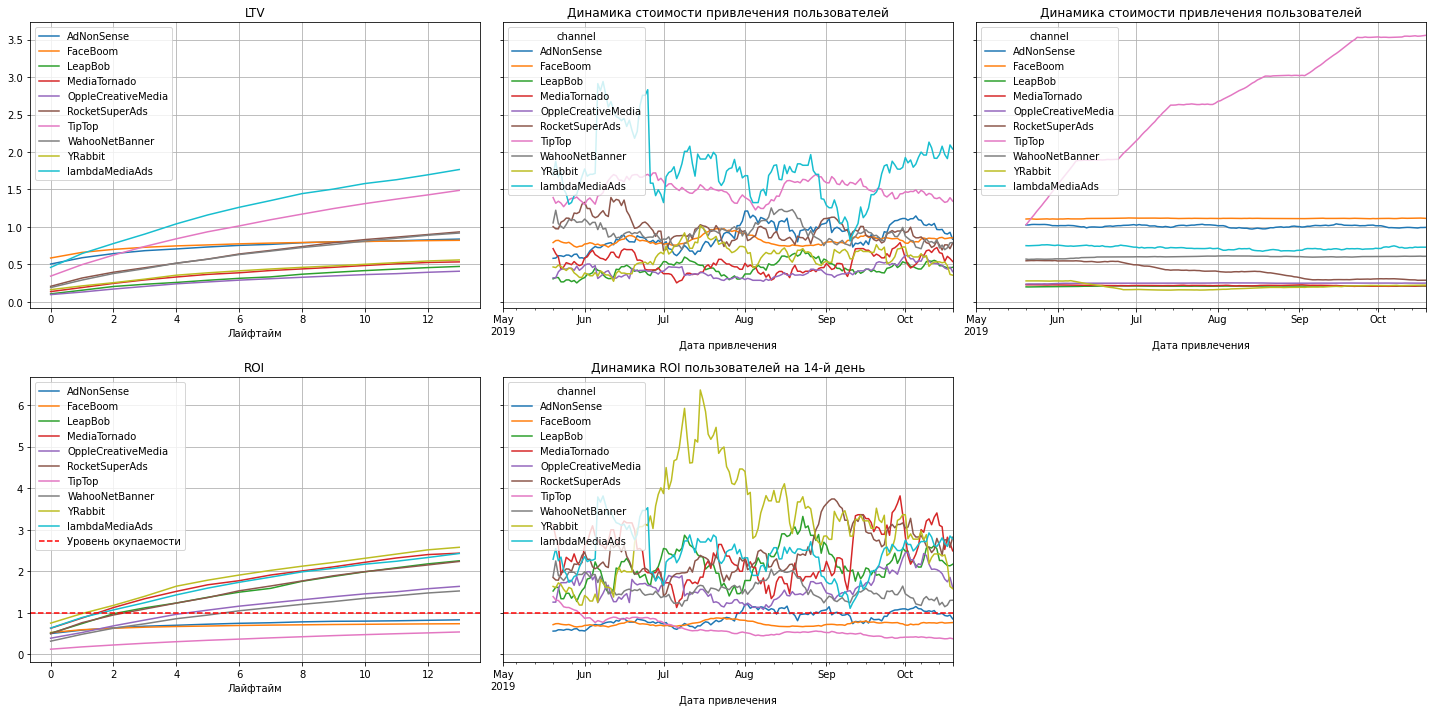

In [36]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=20)

**Вывод:**

* LTV стабилен. Дело не в качестве пользователей;
* CAC - в целом все значения рекламных каналов показывают стабильность. Сильно выделяется Tip Top - стоимость привлечения пользователей растет;
* ROI - реклама не окупается в таких каналах как Tip Top, FaceBoom и AdNonSense. Все остальные в период от 1-6 дней после запуска рекламной кампании.

**Ответы на вопросы:**

1. Окупается ли реклама, направленная на привлечение пользователей в целом?

За указанный горизонт (14 дней) в целом реклама не окупается, но довольно близка к этому значению

2. Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?

Негативное влияние оказывают устройства Mac и Iphone, пользователи привлеченный из США, а также рекламные каналы Tip Top и FaceBoom

3. Чем могут быть вызваны проблемы окупаемости?

Возможно, что проблемы окупаемости вызваны пользователями, которые находятся в США, пользуются продукцией Apple, а также привлечены через Tip Top и FaceBoom. \
\
Можно предположить, что неправильно был выбран либо канал продвижения, либо страна. Так как в США и для каналов Tip Top, и FaceBoom стоимость привлечения пользователя только растет. Вероятней всего приложение не пользуется спросом в этой стране и придется изменить подход. Либо создать спрос, придумав различные преференции, либо уйти из этой страны и не терпеть убытки.

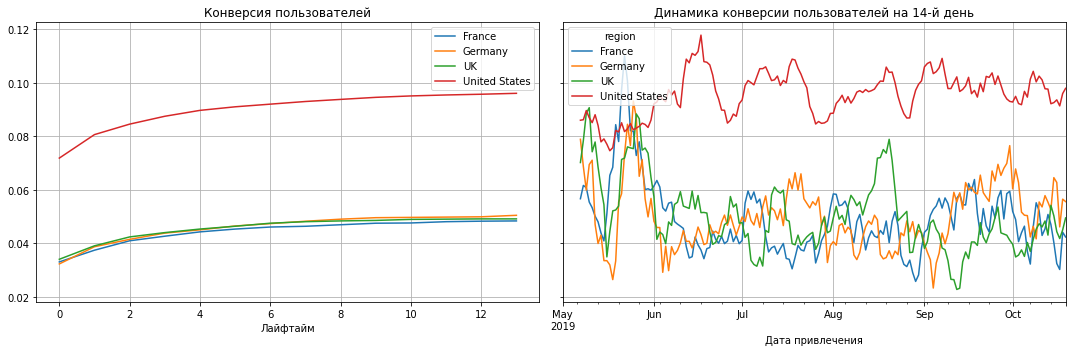

In [37]:
#конверсия пользователей по странам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

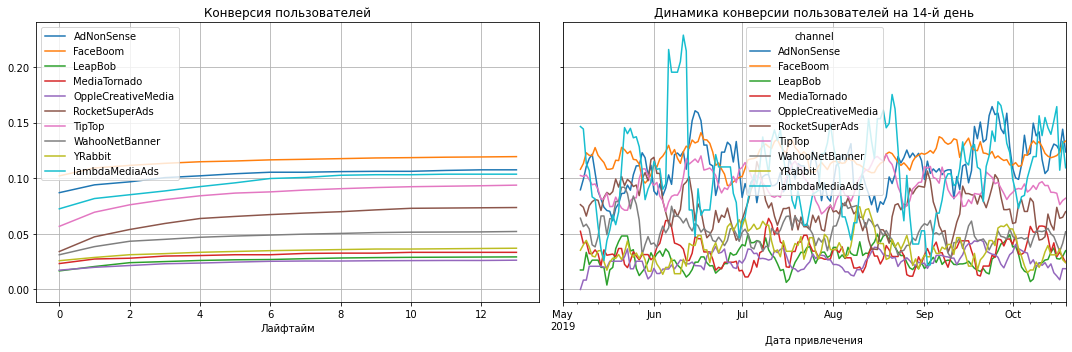

In [38]:
#конверсия пользователей по каналам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

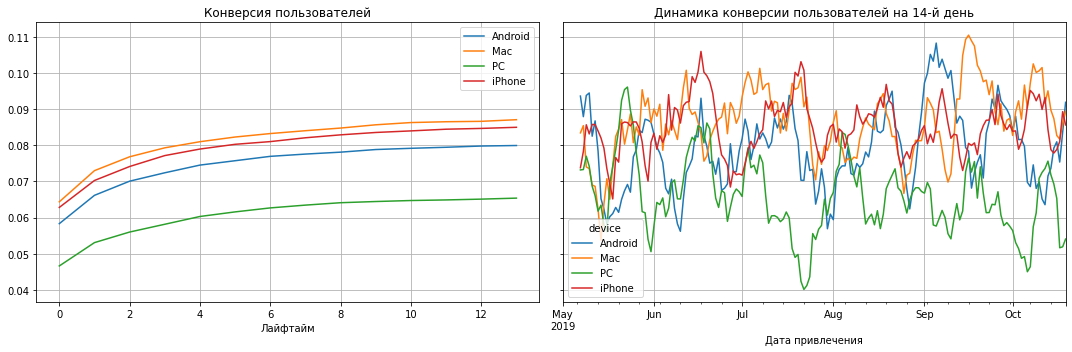

In [39]:
#конверсия пользователей по устройствам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Вывод по конверсии пользователей:**

* По странам. Лучше всего и стабильнее всего реклама заходит в США. На 12 день почти 10%, что в 2 раза больше, чем в остальных странах;
* По каналам. Успешнее всего показывают себя FaceBoom, AdNonSense и IambdaMediaAds. Их конверсия к 12-му дню больше 10%;
* По устройствам. Лучше всех себя показывает продукция Apple - показатель около 8,5%. Показатель отстает у Android на 0,5% (Android - 8%)

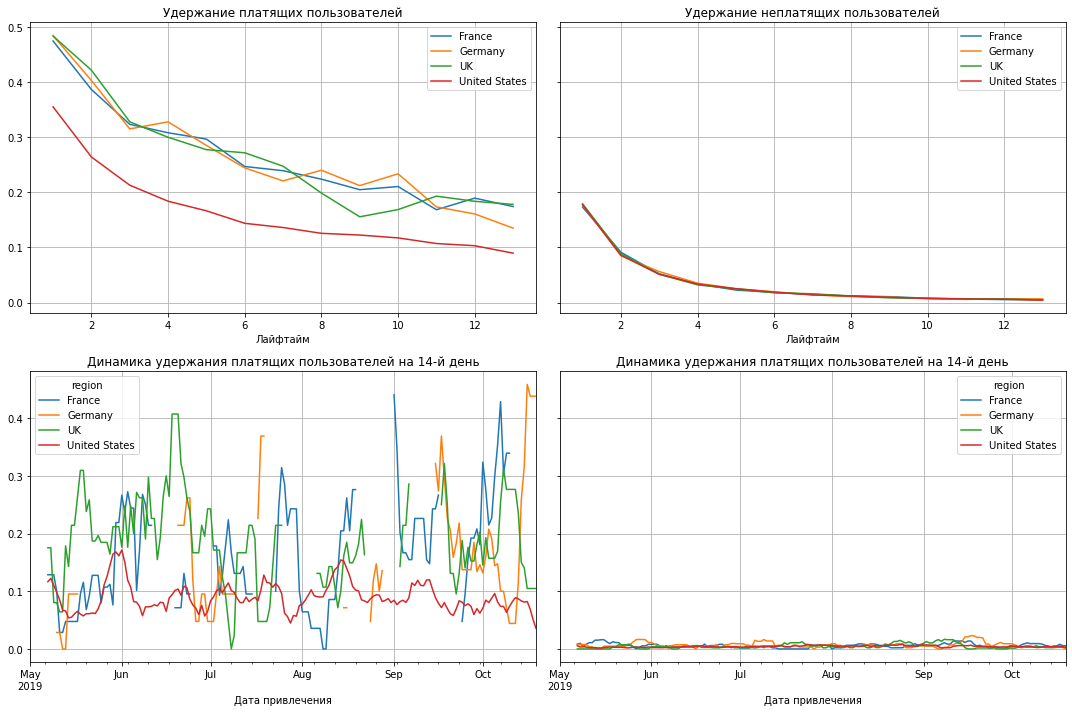

In [40]:
#удержание пользователей по странам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days)

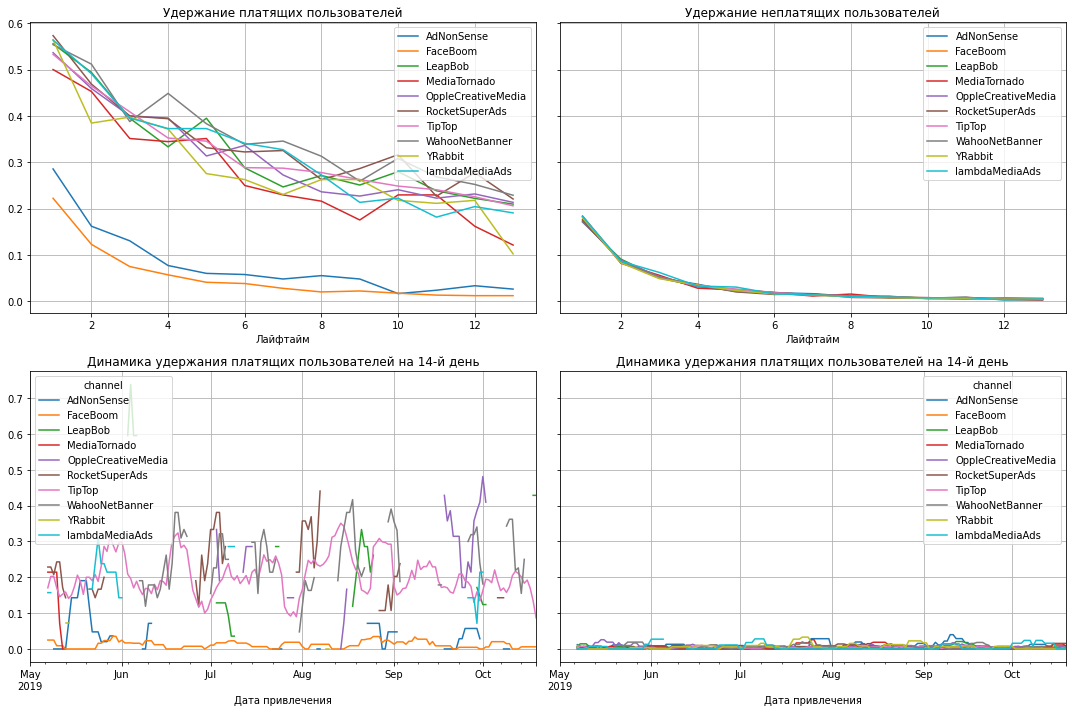

In [41]:
#Удержание пользователей по каналам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days)

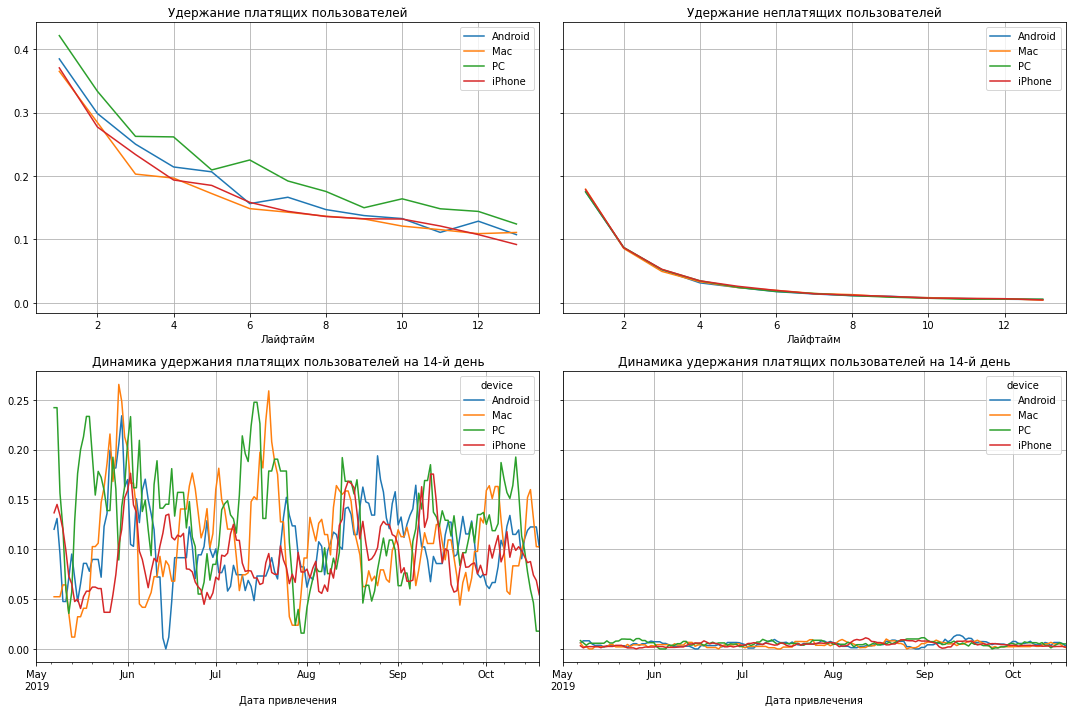

In [42]:
#Удержание пользователей по устройствам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод (удержание пользователей):**

* По странам. Удерживать платящих пользователей из США получается хуже всего - показатель удержания к 12-му дню составляет 10%. По остальным этот показатель около 15-20%. Что касается неплатящих пользователей, то во всех странах ближе к горизонту анализа около 0%;
* По каналам. По платящим пользователям - в целом, по всем каналам привлечения показатель удержания около 20-25%. Кроме MediaTornado и YRabbit - 10-15%. И FaceBoom, и AdNonSense - 2-5%. По неплатящим пользователям та же проблема - показатель к концу анализируемого периода около 0%.
* По устройствам. Что касается устройств, то здесь +- у всех девайсов показатели похожи - 10-15%. Может чуть получше на пару процентов от всех у PC.

### Напишите выводы

**Причины неэффективности привлечения пользователей:**

1. Неправильный анализ рынка США
2. Плохое удержание платящих и неплатящих пользователей
3. Высокая стоимость привлечения новых пользователей (рынок США, устройства Apple, привлекаемых Tip Top и FaceBoom)
4. Реклама в США - проблемы с удержанием платящих пользователей
5. Проблема с удержанием неплатящих пользователей во всех странах. Где-то через 2 недели после рекламы показатель удержания равен 0
6. Канал Tip Top - увеличение стоимости привлечения 1-го пользователя в целых 3 раза по сравнению с остальными каналами
7. Канал FaceBoom, AdNonSense - проблемы с удержанием платящих пользователей. Через 2 недели после привлечения остается всего лишь 2-5%
8. У пользователей PC хуже всего ситуация с конверсией

**Рекомендации для отдела маркетинга:**

1. Использовать дешевые методы привлечения новых пользователей. Чем дороже, тем менее эффективнее
2. Попробовать расширить варианты (каналы) привлечения новых пользователей в странах. В США уж точно, т.к. Tip Top ведет себя неэффективно
3. Найти альтернативу Tip Top, а также FaceBoom
4. Как уже сказано ранее про США, либо создать новый спрос, либо поменять направление развития продукта
5. Чтобы оптимизировать затраты на рекламу в США, следует попробовать перенаправить большую часть средств от Tip Top и FaceBoom в RocketSuperAds
6. В Европе наиболее перспективными являются OppleCreativeMedia и LambdaMediaAds